##  Programming Assignment 2:
# Logistic Regression with Gradient Descent for Classification

<br>

In this assignment, you're **not allowed to use for loops** to do vector/matrix calculations. **Only numpy solutions will be accepted.** 


We will start to realize the power of machine learning methods. You will be implementing gradient descent for logistic regression as discussed in class. We will first run it on a synthetic dataset that is easy to visualize. We then turn to a real dataset which contains images of handwritten digits collected for the purpose of automatic zip code reading. Check this link for more details: https://www.scientificamerican.com/article/mail-sorting-machines-are-crucial-for-the-u-s-postal-service/. 



We start with importing data and libraries we would need for this exercise. 

In [3]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

## Synthetic Data

As a start we will work with a small dataset in which each sample has two features: height and weight. The label of each example is a decision of a physician whether the person should be considered obese (**+1**) or not (**-1**). Don't worry, while the information of height and weight of famous people, including current and past presidents, is available online, the dataset is fictitious and was generated by the function below. You are welcome to try to understand how the function works.

In [4]:
# Generate "n" fictitious samples of height-weight & label
def fictitious(n):
    np.random.seed(seed=666)
    height = np.random.uniform(13, 107, n) / 100
    weight = np.random.uniform(14, 599, n) / 100
    observed_h = height + np.random.uniform(-6, 9, n) / 100
    observed_w = weight + np.random.uniform(-10, 8, n) / 100
    healthy = np.sign(0.5 * weight / height - 3)
    return np.vstack((observed_h, observed_w)).T, healthy

X, y = fictitious(100)

## ACT 1: Plot the dataset (X)
Use matplotlib's scatter function where each point X[i,:] designated in blue / red depending on whether y[i] is +1 or -1. You can use the following links as reference: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), [example](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

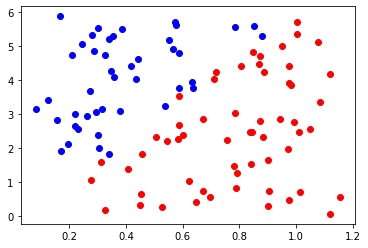

In [5]:
###ACT1###
###Your code goes here.###

xb = X[y==1]
xr = X[y==-1]

plt.scatter(xb[:,0], xb[:, 1], c = 'b')
plt.scatter(xr[:,0], xr[:, 1], c = 'r')



#plt.scatter(X[:,0], X[:,1], c = -y, cmap='bwr')



## ACT 2 - 5 : implement logistic loss and its gradient




* Implement the log_loss function to return the logistic loss $\ell(z)$ for a scalar $z = y_i (\mathbf{w} \cdot \mathbf{x}_i)$ (Don't worry about if $z$ is a vector later on. Numpy will handle it!) <br>
$\textbf{Useful tip:}$ log(1+x) can sometimes return 0 even when x is positive. It is more stable to use the function [ np.log1p()](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html). 


* Implement a function called *empirical_loss* that calculates the average loss on the training data. The function receives a training set $(X, \mathbf{y})$, and a weight vector $\mathbf{w}$ and calls log_loss to return a single number. <br> $\textbf{Tip}$: You can use the @ symbol for matrix multiplication.


* Consider the loss function $\ell(z)$. It's gradient wrt $w$ may be written as the product of three terms: $\ell'(z) \, y \, \mathbf{x}$. Implement *d_log_loss* to take z and return the term $\ell'(z)$.


* Implement a gradient *empirical_grad* function for the logistic loss. Similarly, the function receives a
training set $(X, \mathbf{y})$ and a weight vector $\mathbf{w}$ and calls *d_log_loss* to return the average gradient vector over the input data.


Implement *log_loss* and *d_log_loss* prior to implementing *empirical_loss* and *empirical_grad*

----

Here is a reminder of the logistic loss and its gradient. You can simply map it to the functions $\ell$ and $\ell'$.

$$\mathcal{Loss}(\mathbf{w}) = \frac{1}{|S|} \sum_{i\in S} \log\big(1+e^{-z_i}\big)
~~ \mbox{ where } ~~
z_i = y_i (\mathbf{w} \cdot \mathbf{x}_i) ~~ .$$

The gradient is as follows,
$$ \nabla\mathcal{Loss}(\mathbf{w})  = -\frac{1}{|S|} \sum_{i\in S} q_i y_i \mathbf{x}_i 
~~ \mbox{ where } ~~ q_i = \frac{1}{1 + e^{z_i}} ~~ .
$$

In [6]:
# ACT2: implement l(z)
def log_loss(z):
    ###Your code goes here. please implement the log loss function###
    logloss = np.log1p(np.exp(-z))
    return logloss

# ACT3: Loss(...)
def empirical_loss(X, y, w):
    ###Hint: compute z using matrix operations 
    ###Your code goes here. please implement the empirical loss function###
    z = y*(X@w)
    loss = (1/np.size(z))*np.sum(log_loss(z))
    return loss
    

# ACT4: implement l'(z)
def d_log_loss(z):
    ###Your code goes here. please implement the d_log_loss function###
    q = 1/(1+np.exp(z))
    return q

# ACT5: implement GradLoss(...)
def empirical_grad(X, y, w):
   ###Your code goes here. Please implement the empirical_grad function###
    z = y*(X@w)
    q = d_log_loss(z)
    grad = -(1/np.size(z)) * ((q*y)@X)
    return grad

## ACT 6: calculate loss

Calculate the loss for vectors $(-1/100, 1/100)$ and $(0,0)$. Which one is a better starting point?

In [258]:
### Print the loss for each vector ###
### Format: Loss of "" = "" < loss of "" = "" ###
### e.g. Loss of (1, 1) = 1.6994 < Loss of (2,2) = 3.2440

w0 = [-1/100, 1/100]
w1 = [0,0]

l0 = empirical_loss(X,y,w0)
l1 = empirical_loss(X,y,w1)

print(f"Loss of {w0} = {l0} < loss of {w1} = {l1}")



Loss of [-0.01, 0.01] = 0.6899983386069978 < loss of [0, 0] = 0.6931471805599453


## ACT 7: calculate gradient

Calculate the gradient at the points vectors $(-1/100, 1/100)$ and $(0,0)$. What do you observe?

In [259]:
### Print the gradient for each vector ###
### Format: Gradient of "" : "" (for each vector)###

g0 = empirical_grad(X,y,w0)
g1 = empirical_grad(X,y,w1)

print(f"Gradient of {w0} = {g0}")
print(f"Gradient of {w1} = {g1}")

print("It appears that they point in the same direction")



Gradient of [-0.01, 0.01] = [ 0.14549402 -0.15790906]
Gradient of [0, 0] = [ 0.14194604 -0.18442091]
It appears that they point in the same direction


## ACT 8-10: run gradient descent

We are now ready to run gradient descent and find a good vector $\mathbf{w}$ -- a vector of a small logistic loss on the dataset $(X,y)$. We can simply reuse the code we have from programming assignment 1. We are going to make the code really short and easy to read by simply calling the loss & gradient function we implemented on (X,y). We would change the termination condition though so it will depend on the norm of the gradient. Recall that at the optimum $z^*$ of a scalar function $f(z)$ we have $f'(z^*)=0$. For a function whose argument is a vector we have $\nabla f(\mathbf{w}^*) = (0, 0, \ldots, 0)$. Therefore, as we get close to the optimum our gradients get smaller and smaller. It thus suffices to check the norm of the gradients that GD generates along its run and be content with the solution once it drops below a small threshold.<br> $\textbf{Tip}$: np.linalg.norm() can be used to find the norm of a vector.

In [260]:
### Prints loss of the ith timestep ###
### Takes in: i = timestep
def print_loss(i, X, y, w):
    l = empirical_loss(X, y, w)
    print('{0:3d}: loss={1:5.3f}'.format(i, l))

#ACT 8: Implement gradient descent ####
### Print the loss at timestep 0 and every 100 timesteps ###
### Hint: look at the call below for the function's declaration and parameters it should take in ###
### Hint: use the empirical gradient ###
### Hint: eps is the terminating condition ###
def gradient_descent(X, y, w0, eta, num_iters = 1000, eps = 1e-2):  
    w = w0
    ### YOUR CODE HERE ###
    for i in range(num_iters):
        
        if(i == 0 or i%100 == 0):
            print_loss(i,X,y,w)
        if(np.linalg.norm(empirical_grad(X,y,w)) < eps):
            return w
        grad = empirical_grad(X,y,w)
        w = w - eta[i]*grad
    return w
        
        

w0 = np.zeros(2)
eta = 1.0 * np.ones(1000)
w = gradient_descent(X, y, w0, eta)


  0: loss=0.693
100: loss=0.212
200: loss=0.171
300: loss=0.152


In [261]:
def error_rate(X, y, w):
    return np.mean(y * (X @ w) <= 0)

print('Error rate: ', 100 * error_rate(X, y, w), '%') ### HERE you should expect error rate less than 10.0%

Error rate:  4.0 %


##  ACT 9-10: Visualizing the learned classifier

Let us return to visualizing the data itself, this time overlaying the classifier we have just found. Our predictor 
$\mathbf{w}$ divides the plane into two parts:
* Points $\mathbf{x}$ for which $\mathbf{w \cdot x} > 0$. These points are classified as positive.
* Points $\mathbf{x}$ for which $\mathbf{w \cdot x} < 0$. These points are classified as negative.

There is also a third set, namely all the points for which $\mathbf{w \cdot x} = 0$ . These points form a line in $\mathbb{R}^2$. Let us draw this line along with the original scatter plot. We can do it by choosing a value
$x_1\in\mathbb{R}$, and then calculate, 
$$\mathbf{w \cdot x} = (w_1,w_2) \cdot (x_1,x_2) = w_1 x_1 + w_2 x_2 = 0 ~~ \Rightarrow ~~
  x_2 = -\frac{w_1 x_1}{w_2} ~ .$$
  
For $x_1$ let us choose two values: $\min_i X_{i,0}$ and $\max_i X_{i,0}$. This will give us the maximum and minimum heights in the datasets. For both of these choices of $x_1$, to calculate the corresponding $x_2$ along the $\mathbf{w \cdot x}=0$ line, use the formula for $x_2$ above. We now have two points on the line, and can use ax.plot to plot the whole line through these two points.

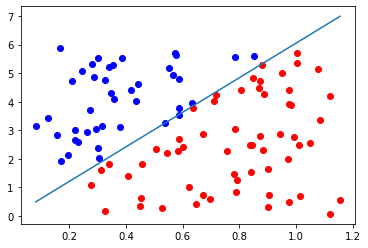

In [262]:
### ACT9: Make a scatter plot with designated in blue / red depending on whether y[i] is +1 or -1 ###
### Your code goes here.###
sign = np.dot(X,w)

xpos = X[sign > 0]
xneg = X[sign < 0]
xequal = X[sign == 0]

plt.scatter(xpos[:,0], xpos[:,1], c = 'b')
plt.scatter(xneg[:,0], xneg[:,1], c = 'r')



### ACT10: add the line to the scatter plot ###
### Your code goes here.###

xmin = np.min(X[:,0])
xmax = np.max(X[:,0])

x2min = -xmin*w[0]/w[1]
x2max = -xmax*w[0]/w[1]

plt.plot([xmin,xmax], [x2min,x2max])



## ACT 11-13: Recognizing Digits from Images

We use the function imshow to display sample images from the MNIST dataset along with their corresponding labels. You can read more about imshow [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

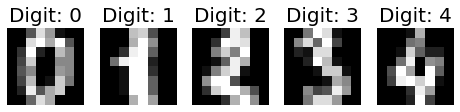

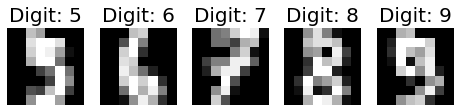

In [263]:
# You can use this code to display some of the images in the MNIST datset and their labels
digits = load_digits()
for i in range(0, 10, 5):
    plt.figure(figsize=(8,8))
    for index, (image, label) in enumerate(zip(digits.data[i+0:i+5], digits.target[i+0:i+5])):
        ax = plt.subplot(1, 5, index + 1)
        ax.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
        ax.axis('off')
        plt.title('Digit: %i' % label, fontsize = 20)
        


In [264]:
# ACTs 11-13: Take only images corresponding to the digits "0" or "1" and split the data 3/4 train and 1/4 test

#### ACT 11: Find relevant indices and take only images for digits "0" or "1"####

Xd = digits.data[(digits.target==1) + (digits.target==0)]

### ACT 12 create training set with the first 3/4's of the data and testing set with the rest.#####
### Hint: you must select the appropiate labels from the dataset, not make them yourself.###
### assign labels in the set {+1, -1}. Your code goes here. ###

yd = digits.target[(digits.target==1) + (digits.target==0)]

yd[yd==0] = -1
train_size = int((3/4) * (np.size(yd)))


### Split and store training sets in Xd, yd and test sets in Xd_test, yd_test ###

Xd_train = Xd[0:train_size]
Xd_test = Xd[train_size:]

yd_train = yd[0:train_size]
yd_test = yd[train_size:]

w0 = np.zeros(len(Xd[0,:]))
eta = 0.05 * np.ones(1000)

### ACT 13 ###
w = gradient_descent(Xd_train, yd_train, w0, eta) 
#### use the gradient descent function to return w###



print('\nTest loss: ', empirical_loss(Xd_test, yd_test, w).round(3)) ### You should expect a value less than 0.1
print('Test error:', 100 * error_rate(Xd_test, yd_test, w).round(3), '%') ### You should expect a value less than 10%

  0: loss=0.693

Test loss:  0.039
Test error: 2.1999999999999997 %


## ACT 14: Visualizing the classifier

Since the classifier $\mathbf{w}$ is of the same dimension as $\mathbf{x}$ we can reshape it to $8 \times 8$ matrix and visualize it as if it was a digit.

**ACT14**: use imshow to visualize the classifier

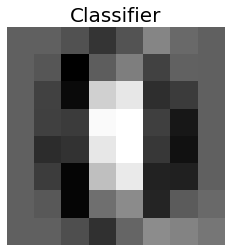

In [265]:
### ACT 14 ###
### Your code goes here. Please use cmap=plt.cm.gray ###
wr = np.reshape(w, (8,8))
plt.imshow(wr,cmap=plt.cm.gray)
plt.axis('off')
_ = plt.title('Classifier', fontsize = 20)

## ACT 15: Answer the following question

### Explain what the pattern of positive and negative weights in the visualization above tells us about the classifier

For example, what pixels seem most salient to the classification? 

**ACT15**: The pixels that seem most important are the white ones and black ones, whereas the gray pixels seems less important. The white pixels correpspond to more positive weights, the black pixels corresond to more negative weights where as the grayer ones correspond to ones closer to zero.  

## ACT 16-18: Train the classifier

We have learned to train a classifier to distinguish between digits 0 and 1. Now we will train a new classifier that distinguishes between digits 7 and 8. 

In [266]:
### ACT: repeat for digits 7 & 8 ###
### ACTS 16-18 ###
### ACT 16 Find relevant indices and take only images for digits "7" or "8" and store them in Xd ###

Xd = digits.data[(digits.target==7) + (digits.target==8)]

## ACT 17 create training set with the first 3/4's of the data and testing set with the rest. ###
yd = digits.target[(digits.target==7) + (digits.target==8)]

yd[yd==7] = 1
yd[yd==8] = -1

train_size = int((3/4) * (np.size(yd)))
### Assigns labels in {+1, -1}. Your code goes here. ###
### Split and store training sets in Xd, yd and test sets in Xd_test, yd_test ###


Xd_train = Xd[0:train_size]
Xd_test = Xd[train_size:]

yd_train = yd[0:train_size]
yd_test = yd[train_size:]


### Initialize w0 and eta ###
w0 = np.zeros(len(Xd[0,:]))
eta = 0.05 * np.ones(1000)

w = gradient_descent(Xd_train, yd_train, w0, eta)
### Print test loss and test error ###
print('\nTest loss: ', empirical_loss(Xd_test, yd_test, w).round(3)) ### You should expect a value less than 0.5
print('Test error:', 100 * error_rate(Xd_test, yd_test, w).round(2), '%') ### You should expect a value less than 10%

  0: loss=0.693

Test loss:  0.254
Test error: 3.0 %


### OMG, still almost perfect!
A logistic regression model seems to work pretty well to distinguish between two different digits, regardless of what those digits are.

## ACT 19: Visualize the classifier again

Does it still resemble a digit?

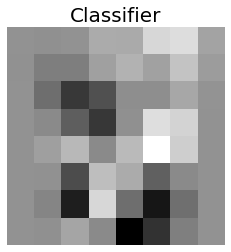

In [267]:
###please put your imshow code here, again using cmap=plt.cm.gray###
###ACT 19: Your code goes here.###
wr = np.reshape(w, (8,8))
plt.imshow(wr, cmap = plt.cm.gray)
plt.axis('off')
_ = plt.title('Classifier', fontsize = 20)

Let us make the problem harder. 

## ACT 20-21: Train a new classifier

Construct a dataset so the digits 0,1,2,3, and 4 have label +1 and digits 5,6,7,8,9 have label -1. Then train a classifier to distinguish between these two classes.

In [268]:
Xd = digits.data
### ACT 20 create training set with the first 3/4's of the data and testing set with the rest. ###
yd = digits.target
### assigns appropriate labels in {+1,-1}. Your code goes here. ###
### Split and store training sets in Xd, yd and test sets in Xd_test, yd_test ###

yd[yd <= 4] = 1
yd[yd > 4 ] = -1

train_size = int((3/4) * (np.size(yd)))

Xd_train = Xd[0:train_size]
Xd_test = Xd[train_size:]

yd_train = yd[0:train_size]
yd_test = yd[train_size:]

### Initialize w0 and eta ###
w0 = np.zeros(len(Xd[0,:]))
eta = 0.05 * np.ones(1000)

w = gradient_descent(Xd_train, yd_train, w0, eta)

### Print test loss and test error ###
print('\nTest loss: ', empirical_loss(Xd_test, yd_test, w).round(3)) ### You should expect a value less than 2
print('Test error:', 100 * error_rate(Xd_test, yd_test, w).round(2), '%') ### You should expect a value less than 30%

  0: loss=0.693
100: loss=0.619
200: loss=0.520
300: loss=0.529
400: loss=0.560
500: loss=3.080
600: loss=0.674
700: loss=0.432
800: loss=0.444
900: loss=0.453

Test loss:  1.444
Test error: 17.0 %


### OK, now it looks different

We do well on the training data but the error rate and loss on test data is horrible albeit better than random guessing.


## ACT 21: Visualize the classifier

Finally let us visualize the classifier last time. You can contemplate the results of this.

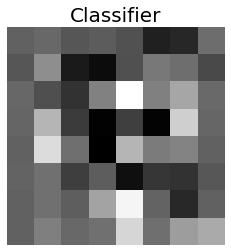

In [269]:
###please put your imshow here, again using cmap=plt.cm.gray###
wr = np.reshape(w, (8,8))
plt.imshow(wr, cmap = plt.cm.gray)
plt.axis('off')
_ = plt.title('Classifier', fontsize = 20)

No resemblance to a specific digit. Next time we work with images of digits we will predict the index of the digit rather than making a binary yes/no +/- prediction.